# Keras를 사용한 ML 기본사항

## 기본 이미지 분류

### 첫 번쨰 신경망 훈련하기: 기초적인 분류 문제

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


#### 패션 MNIST 데이터셋 임포트하기
- 10개의 카테고리
- 70,000개의 28x28픽셀 흑백 이미지

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

# load_data() 함수를 호출하면 넘파이 배열 반환
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
# 각 이미지는 하나의 레이블에 매핑되어 있음.
# 레이블은 0에서 9까지의 정수 배열
# 나중에 이미지를 출력하기 위한 카테고리 리스트 저장
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# 60,000개의 이미지, 28x28 픽셀
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
# 10,000개의 이미지, 28x28 픽셀
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

#### 데이터 전처리
- 픽셀 값의 범위는 0~255

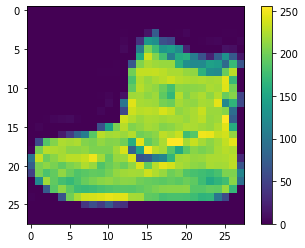

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# 값의 범위를 0~1 사이로 조정
train_images = train_images / 255.0
test_images = test_images / 255.0

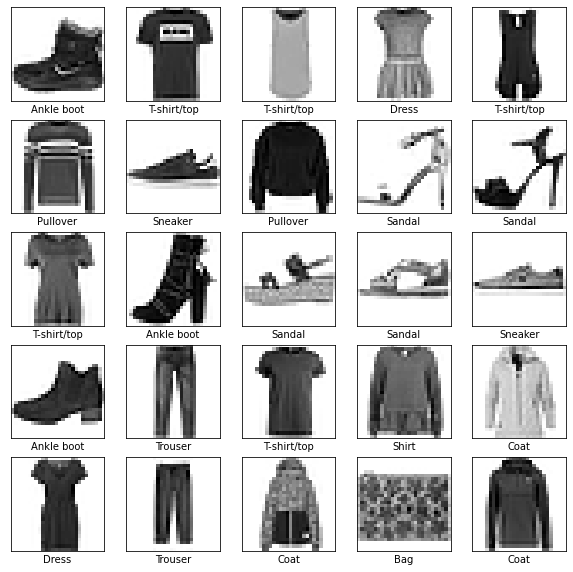

In [ ]:
# 훈련 세트에서 처음 25개 이미지와 클래스 이름 출력
plt. figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#### 모델 구성
- 신경망 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일

##### 층 설정
- 신경망의 기본 구성 요소는 층(layer)임. 층은 주입된 데이터에서 표현을 추출함.

In [ ]:
'''
첫 번째 층은 2차원 배열의 이미지 포맷을 28 * 28 = 784 픽셀의 1차원 배열로 변환함.
나머지 두 개의 층을 밀집 연결 또는 완전 연결 층이라고 부름.
첫 번째의 층은 128개의 노드(뉴런)을 가짐.
마지막 층은 10개의 확률을 반환하고 반환된 값의 전체 합은 1임
'''
model = keras.Sequential([
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(10, activation='softmax')
])

##### 모델 컴파일
- 손실 함수(Loss function) - 훈련 하는 동안 모델의 오차를 측정. 모델의 학습이 올바른 방향으로 향하도록 이 함수를 최소화해야함.
- 옵티마이저(Optimizer) - 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정
- 지표(Metrics) - 훈련 단계와 테스트 단계를 모니터링하기 위해 사용

In [ ]:
'''
1. categorical_crossentropy
출력 값이 one-hot encoding된 결과로 나온다. -> label(y)을 one-hot encoding해서 넣어줘야 함
클래스가 상호 배타적일 경우(e.g. 각 샘플이 정확히 하나의 클래스에 속하는 경우) 사용
 
2. sparse_categorical_crossentropy
integer type 클래스 -> one-hot encoding하지 않고 정수 형태로 label(y)을 넣어줌
한 샘플에 여러 클래스가 있거나 label이 soft 확률일 경우 사용
'''
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### 모델 훈련
1. 훈련 데이터를 모델에 주입
2. 모델이 이미지와 레이블을 매핑하는 방법을 학습
3. 테스트 세트에 대한 모델의 예측을 만듬. 이 예측이 test_labels 배열의 레이블과 맞는지 확인

In [ ]:
# 훈련을 시작하기 위해 model.fit 메서드 호출
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5939 - accuracy: 0.7938
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3449 - accuracy: 0.8757
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3151 - accuracy: 0.8868
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2847 - accuracy: 0.8988
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2750 - accuracy: 0.9016


#### 정확도 평가

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.3320 - accuracy: 0.8810

테스트 정확도: 0.8809999823570251


#### 예측 만들기

In [ ]:
# 훈련된 모델을 사용하여 이미지에 대한 예측 만듬
predictions = model.predict(test_images)

In [ ]:
# 10개의 숫자 배열로 표시. 이 값은 10개의 카테고리에 상응하는 모델의 신뢰도
predictions[0]

array([1.4821456e-06, 3.8495087e-09, 1.5284068e-06, 1.4863112e-08,
       3.8204860e-08, 1.0873589e-02, 4.3380765e-06, 2.8395955e-03,
       5.7534147e-05, 9.8622185e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
# 10개 클래스에 대한 예측 모두 그래프로 표현
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[predicted_label].set_color('blue')

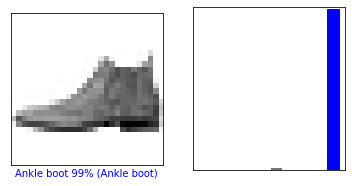

In [ ]:
# 0번째 원소의 이미지, 예측, 신뢰도 점수 배열 확인
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

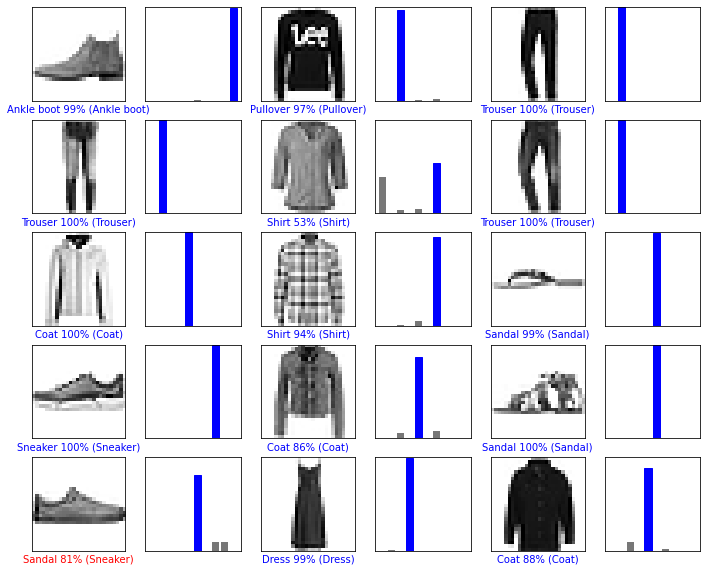

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [ ]:
# 훈련된 모델을 사용하여 한 이미지에 대한 예측 만듬
img = test_images[0]

print(img.shape)

(28, 28)


In [ ]:
# tf.keras 모델은 한 번에 샘플의 묶음 또는 배치로 예측을 만드는데 최적화되어 있음
#  하나의 이미지를 사용할 때에도 2차원 배열로 만들어야함
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [ ]:
# 이미지의 예측 생성
predictions_single = model.predict(img)
print(predictions_single )

[[1.4821443e-06 3.8495012e-09 1.5284052e-06 1.4863112e-08 3.8204860e-08
  1.0873589e-02 4.3380724e-06 2.8395928e-03 5.7534147e-05 9.8622185e-01]]


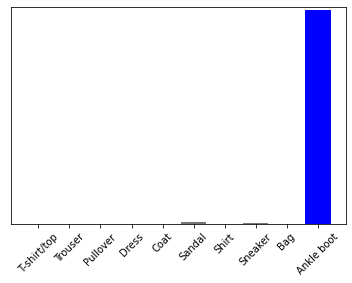

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

9

---

## 기본 텍스트 분류

### 영화 리뷰를 사용한 텍스트 분류
- IMDB 데이터셋
  - 영화 리뷰 텍스트는 긍정 또는 부정으로 분류.
  - 이진 분류 문제임
  - 데이터셋은 훈련용 25,000개 테스트용 25,000개로 나눠져 있음

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
print(tf.__version__)

2.4.1


In [ ]:
# 데이터셋 다운로드
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

### 데이터 탐색
- 데이터셋의 샘플은 전처리된 정수 배열
- 이 정수는 영화 리뷰에 나오는 단어를 나타냄
- 0은 부정적 리뷰, 1은 긍정적 리뷰

In [ ]:
print(f"훈련 샘플: {len(train_data)}, 레이블: {len(train_labels)}")

훈련 샘플: 25000, 레이블: 25000


In [ ]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
# 첫 번째 리뷰와 두 번째 리뷰에서 단어의 개수 출력
len(train_data[0]), len(train_data[1])

(218, 189)

### 정수를 단어로 다시 변환하기

In [ ]:
# 정수와 문자열을 매핑한 딕셔너리 객체에 질의하는 헬퍼 함수를 만듬

# 단어와 정수 인덱스를 매핑한 딕셔너리
word_index = imdb.get_word_index()

# 처음 몇 개 인덱스는 사전에 정의되어 있습니다
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [ ]:
# decode_review 함수를 사용해 첫 번째 리뷰 텍스트 출력
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

### 데이터 준비
- 리뷰-정수 배열은 신경망에 주입하기 전에 텐서로 변환해야함
  - 원핫 인코딩
  - 정수 배열의 길이가 모두 같도록 패딩을 추가해 max_length * num_reviews 크기의 정수 텐서를 만듬

In [ ]:
# pad_sequences 함수를 사용해 길이를 맞춤
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [ ]:
# 샘플의 길이 확인
len(train_data[0]), len(train_data[1])

(256, 256)

In [ ]:
# 패딩된 첫 번째 리뷰 확인 
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

### 모델 구성
- 모델에서 얼마나 많은 층을 사용할 것인가?
- 각 층에서 얼마나 많은 은닉 유닛을 사용할 것인가? 

In [ ]:
'''
층을 순서대로 쌓아 분류기를 만듬
1. 첫 번째 층은 Embedding층. 정수로 인코딩된 단어를 입력 받고, 각 단어 인덱스에 해당하는
임베딩 벡터를 찾아줌
2. GlobalAveragePooling1D층은 sequence 차원에 대해 평균을 계산하여
각 샘플에 대해 고정된 길이의 출력 벡터를 반환함.
3. 고정된 길이의 출력 벡터는 16개의 은닉 유닛을 가진 완전 연결층을 거침
4. 마지막 층은 하나의 출력 노드를 가진 완전 연결 층. 
sigmoid 활성화 함수를 사용하여 0과 1사이의 실수를 출력함.
'''

# 입력 크기는 영화 리뷰 데이터셋에 적용된 어휘 사전의 크기
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16, input_shape=(None,)))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


### 은닉 유닛
- 위 모델에는 입력과 출력 사이에 은닉층이 있음
- 출력의 개수는 층이 가진 표현 공간의 차원이 됨

### 손실 함수와 옵티마이저
- 모델이 훈련하려면 손실 함수와 옵티마이저가 필요함

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### 검증 세트 만들기


In [ ]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

### 모델 훈련

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 1s 25ms/step - loss: 0.6924 - accuracy: 0.5118 - val_loss: 0.6892 - val_accuracy: 0.5334
Epoch 2/40
30/30 [==============================] - 0s 14ms/step - loss: 0.6861 - accuracy: 0.5499 - val_loss: 0.6780 - val_accuracy: 0.6766
Epoch 3/40
30/30 [==============================] - 0s 13ms/step - loss: 0.6708 - accuracy: 0.6915 - val_loss: 0.6571 - val_accuracy: 0.7150
Epoch 4/40
30/30 [==============================] - 0s 13ms/step - loss: 0.6454 - accuracy: 0.7379 - val_loss: 0.6260 - val_accuracy: 0.7607
Epoch 5/40
30/30 [==============================] - 0s 13ms/step - loss: 0.6078 - accuracy: 0.7824 - val_loss: 0.5868 - val_accuracy: 0.8008
Epoch 6/40
30/30 [==============================] - 0s 13ms/step - loss: 0.5628 - accuracy: 0.8139 - val_loss: 0.5417 - val_accuracy: 0.8171
Epoch 7/40
30/30 [==============================] - 0s 13ms/step - loss: 0.5120 - accuracy: 0.8398 - val_loss: 0.4964 - val_accuracy: 0.8330
Epoch 8/40
30

### 모델 평가

In [ ]:
results = model.evaluate(test_data, test_labels, verbose=2)
print(results)

782/782 - 1s - loss: 0.3476 - accuracy: 0.8693
[0.3476451635360718, 0.8692799806594849]


### 정확도와 손실 그래프 그리기

In [ ]:
# model.fit()은 history 객체를 반환함. 
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

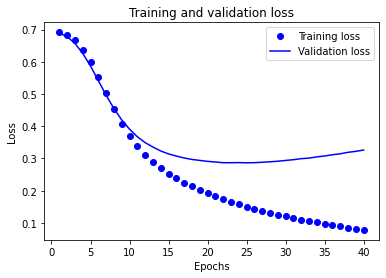

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# 'bo'는 파란ㅅ개 점
plt.plot(epochs, loss, 'bo', label='Training loss')
# 'b'는 파란 실선
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

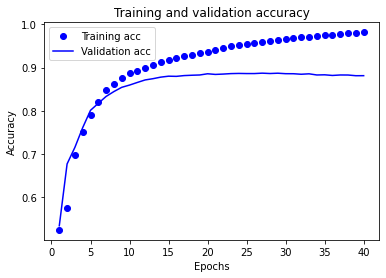

In [ ]:
plt.clf() # 그림을 초기화

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## TF Hub로 텍스트 분류

In [ ]:
import numpy as np

import tensorflow as tf

!pip install -q tensorflow-hub
!pip install -q tfds-nightly
import tensorflow_hub as hub
import tensorflow_datasets as tfds

print("버전: ", tf.__version__)
print("즉시 실행 모드: ", tf.executing_eagerly())
print("허브 버전: ", hub.__version__)
print("GPU", "사용 가능" if tf.config.experimental.list_physical_devices("GPU") else "사용 불가능")

버전:  2.4.1
즉시 실행 모드:  True
허브 버전:  0.12.0
GPU 사용 가능


In [ ]:
train_data, validation_data, test_data = tfds.load(
    name='imdb_reviews',
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True
)

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


### 데이터 탐색

In [ ]:
# 처음 10개의 샘플 출력
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
train_examples_batch

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell 

In [ ]:
train_labels_batch

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])>

### 모델 구성
- 어떻게 텍스트를 표현할 것인가?
- 모델에서 얼마나 많은 층을 사용할 것인가?
- 각 층에서 얼마나 많은 은닉 유닛을 사용할 것인가?


텍스트를 표현하는 방법은 문장을 임베딩 벡터로 바꾸는 것
- 텍스트 전처리에 대해 신경 쓸 필요가 없음
- 전이 학습의 장점을 이용함
- 임베딩은 고정 크기이기 때문에 처리 과정이 단순해짐

In [ ]:
# 텐서플로 허브 모델을 사용하는 케라스 층 만들기
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[],
                           dtype=tf.string, trainable=True)
hub_layer(train_examples_batch[:3])

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ],
       [ 1.8804485 , -2.5852382 ,  3.4066997 ,  1.0982676 , -4.056685  ,
        -4.891284  , -2.785554  ,  1.3874227 ,  3.8476458 , -0.9256538 ,
        -1.896706  ,  1.2113281 ,  0.11474707,  0.76209456, -4.8791065 ,
         2.906149  ,  4.7087674 , -2.3652055 , -3.5015898 , -1.6390051 ],
       [ 0.71152234, -0.6353217 ,  1.7385626 , -1.1168286 , -0.5451594 ,
        -1.1808156 ,  0.09504455,  1.4653089 ,  0.66059524,  0.79308075,
        -2.2268345 ,  0.07446612, -1.4075904 , -0.70645386, -1.907037  ,
         1.4419787 ,  1.9551861 , -0.42660055, -2.8022065 ,  0.43727064]],
      dtype=float32)>

In [ ]:
'''
첫 번째 층은 텐서플로 허브층. 사전 훈련된 모델을 사용하여 하나의 문장을 임베딩 벡터로 매핑
사전 훈련된 텍스트 임베딩 모델은 하나의 문장을 토큰으로 나누고 각 토큰의 임베딩을 연결하여 반환
이 고정 크기의 출력 벡터는 16개의 은닉 유닛을 가진 완전 연결 층으로 주입
마지막 층은 하나의 출력 노드를 가진 완전 연결 층. sigmoid 활성화 함수를 사용
'''

# 전체 모델 만들기 
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


### 손실 함수와 옵티마이저

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

### 모델 훈련

In [ ]:
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=20,
                    validation_data=validation_data.batch(512),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 3s 71ms/step - loss: 0.7584 - accuracy: 0.5047 - val_loss: 0.6606 - val_accuracy: 0.5923
Epoch 2/20
30/30 [==============================] - 2s 52ms/step - loss: 0.6475 - accuracy: 0.6040 - val_loss: 0.6065 - val_accuracy: 0.6360
Epoch 3/20
30/30 [==============================] - 2s 52ms/step - loss: 0.5979 - accuracy: 0.6511 - val_loss: 0.5655 - val_accuracy: 0.6832
Epoch 4/20
30/30 [==============================] - 2s 53ms/step - loss: 0.5491 - accuracy: 0.7016 - val_loss: 0.5299 - val_accuracy: 0.7094
Epoch 5/20
30/30 [==============================] - 2s 53ms/step - loss: 0.5112 - accuracy: 0.7254 - val_loss: 0.4995 - val_accuracy: 0.7549
Epoch 6/20
30/30 [==============================] - 2s 54ms/step - loss: 0.4800 - accuracy: 0.7555 - val_loss: 0.4680 - val_accuracy: 0.7735
Epoch 7/20
30/30 [==============================] - 2s 55ms/step - loss: 0.4393 - accuracy: 0.7895 - val_loss: 0.4399 - val_accuracy: 0.7850
Epoch 8/20
30

### 모델 평가

In [ ]:
results = model.evaluate(test_data.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
    print('%s: %.3f' % (name, value))

49/49 - 2s - loss: 0.3235 - accuracy: 0.8593
loss: 0.324
accuracy: 0.859


---

# 회귀
- 자동차 연비 예측하기

In [ ]:
pip install -q seaborn

In [ ]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.4.1


In [ ]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/root/.keras/datasets/auto-mpg.data'

In [ ]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
# na_values - '?'를 문자열이 아닌 결측값으로 인식할 수 있게 해줌
# comment - '\t'으로 시작하는 행 무시
# skipinitialspace - 구분기호 뒤 공백 무시
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                          na_values='?', comment='\t', 
                          sep=' ', skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


### 데이터 정제하기

In [ ]:
# 결측치 확인 
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
# 누락된 행 삭제
dataset = dataset.dropna()

In [ ]:
'''
pd.get_dummies()
from sklearn.preprocessing import OneHotEncoder
'''

# 'Origin' 열은 수치형이 아닌 범주형이므로 원핫 인코딩으로 변환
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1) * 1.0
dataset['Europe'] = (origin == 2) * 1.0
dataset['Japan'] = (origin == 3) * 1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


### 데이터셋을 훈련 세트와 테스트 세트로 분할하기

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)

test_dataset = dataset.drop(train_dataset.index)

### 데이터 조사하기

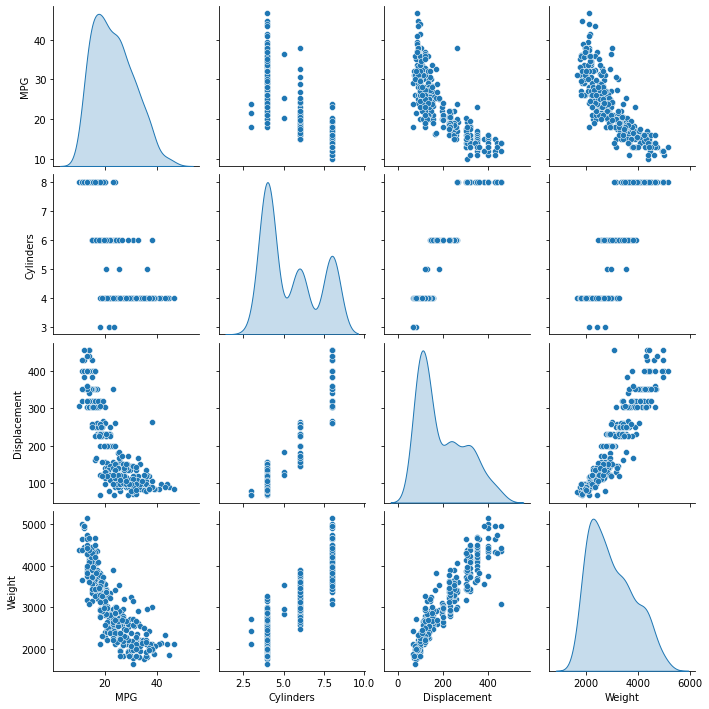

In [ ]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [ ]:
# 통계 확인
train_stats = train_dataset.describe()
train_stats.pop('MPG')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


### 특성과 레이블 분리

In [ ]:
# 레이블을 예측하기 위해 특성에서 MPG 분리
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

### 데이터 정규화
- 특성의 스케일과 범위가 다르면 정규화 하는 것이 권장됨 

In [ ]:
# from sklearn.preprocessing import StandardScaler
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

### 모델 만들기

In [ ]:
'''
mse - 평균 제곱 오차: 오차 값에 제곱을 한 후 평균
mae - 평균 절대 오차: 오차 값에 절대값을 취한 후 평균

RMSprop - 기울기를 단순 누적하지 않고 지수 가중 이동 평균을
          사용하여 최신 기울기들이 더 크게 반영되도록함
'''

# 두 개의 완전 연결 은닉층으로 Sequential 모델 만듬
# 출력 층안 하나의 연속적인 값을 반환
def build_model():
    model = keras.Sequential([
                              layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
                              layers.Dense(64, activation='relu'),
                              layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 훈련 세트에서 10개의 샘플을 하나의 배치로 만들어 model.predict 메서드 호출
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.03910212],
       [ 0.21153633],
       [ 0.34564143],
       [ 0.05439222],
       [-0.10476989],
       [ 0.26973855],
       [-0.09393856],
       [ 0.03986332],
       [ 0.24987881],
       [-0.04742989]], dtype=float32)

### 모델 훈련

In [ ]:
# 1,000번의 에폭 동안 훈련
# 에폭이 끝날 때마다 도트를 출력해 훈련 진행 과정 표시
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print(' ')
        print('.', end='')

EPOCHS = 1000

history = model.fit(
    normed_train_data, train_labels,
    epochs=EPOCHS, validation_split=0.2, verbose=0,
    callbacks=[PrintDot()])

 
.................................................................................................... 
.................................................................................................... 
.................................................................................................... 
.................................................................................................... 
.................................................................................................... 
.................................................................................................... 
.................................................................................................... 
.................................................................................................... 
.................................................................................................... 
................................................................................

In [ ]:
# history 객체에 저장된 통계치를 사용해 모델의 훈련 과정을 시각화
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,3.007833,1.129129,3.007833,10.281873,2.427793,10.281873,995
996,2.783360,1.057712,2.783360,10.090785,2.401221,10.090785,996
997,2.883037,1.111113,2.883037,10.287863,2.447645,10.287863,997
998,2.946078,1.149619,2.946078,9.982899,2.388299,9.982899,998
999,2.922202,1.117823,2.922202,10.577782,2.495946,10.577782,999


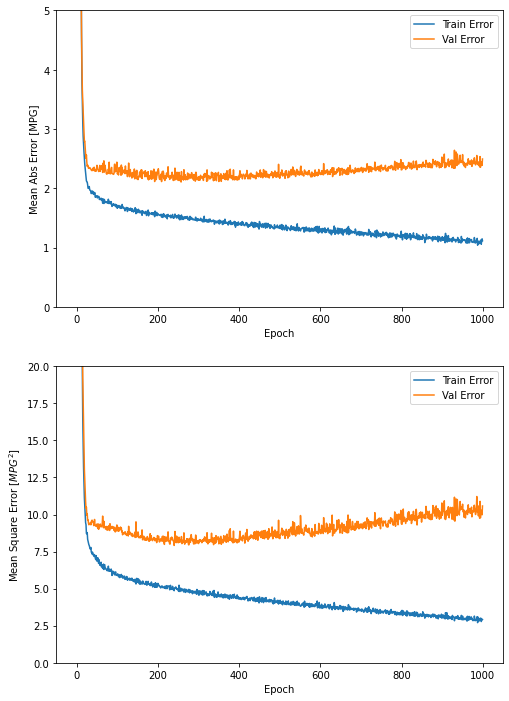

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(8, 12))

    plt.subplot(2, 1, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'],
             label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
             label='Val Error')
    plt.ylim([0, 5])
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'],
             label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
             label='Val Error')
    plt.ylim([0, 20])
    plt.legend()
    plt.show()

plot_history(history)

- 그래프를 보면 수 백번 에폭을 진행한 이후에는 모델이 거의 향상되지 않는 것으로 보임

 
.................................................................

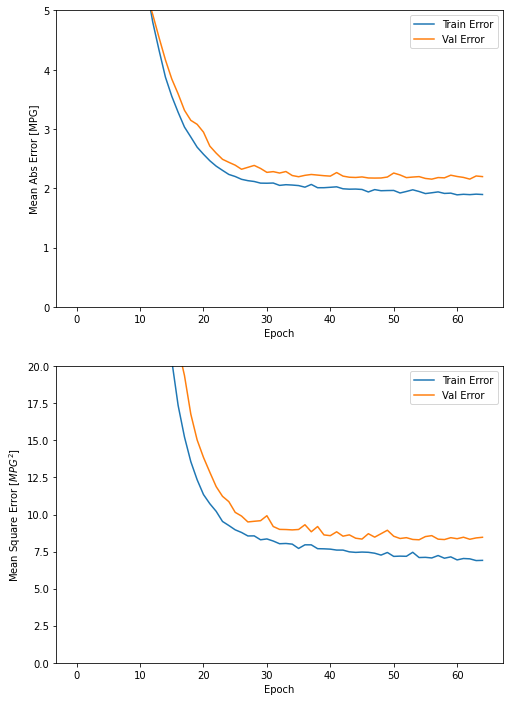

In [ ]:
# 검증 점수가 향상되지 않으면 자동으로 훈련을 멈추도록 수정
# EarlyStopping 콜백을 사용

model = build_model()

# patience 매개변수는 성능 향상을 체크할 에폭 횟수
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [ ]:
# 테스트 세트에서의 모델 성능 확인 
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print('테스트 세트의 평균 절대 오차: {:5.2f} MPG'.format(mae))

3/3 - 0s - loss: 5.9358 - mae: 1.8723 - mse: 5.9358
테스트 세트의 평균 절대 오차:  1.87 MPG


### 예측

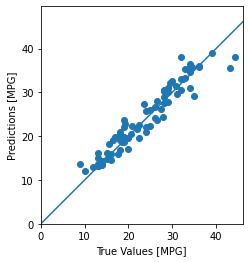

In [ ]:
# 테스트 세트에 있는 샘플을 사용해 MPG 값 예측
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

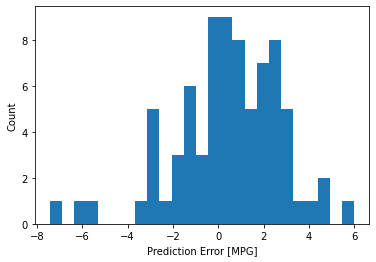

In [ ]:
# 오차의 분포 확인
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel('Count')

### 결론
- 평균 제곱 오차(MSE)는 회귀 무제에서 자주 사용하는 손실 함수
- 회귀에서 사용되는 평가 지표는 평균 절댓값 오차(MAE)
- 수치 입력 데이터의 특성이 여러 가지 범위를 가질 때 동일한 범위가 되도록 스케일 조정 해야함
- 훈련 데이터가 많지 않다면 과대적합을 피하기 위해 은닉층의 개수가 적은 소규모 네트워크를 선택
- Early stopping은 과대적합을 방지하기 위한 좋은 방법

---

## 과적합 및 과소적합

- 과적합(Overfitting)
  - 학습 데이터에 대해 과하게 학습하여 실제 데이터에 대한 오차가 증가하는 현상
    - 훈련 데이터를 더 많이 사용
    - 정규화(Regularization)을 사용
- 과소적합(Underfitting)
  - 모델이 너무 단순하거나, 규제가 너무 많아 학습을 충분히 하지 못할 때 발생하는 현상
    - 파라미터가 더 많은 모델을 선택
    - 모델의 제약을 줄이기
    - 과적합 되기 전 시점까지 충분히 학습

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [ ]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

17465344/17464789 [==============================] - 1s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

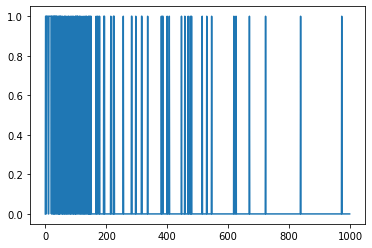

In [ ]:
plt.plot(train_data[0])

### 과대적합 예제

- 과대적합을 막는 가장 간단한 방법은 모델의 규모를 축소하는 것
  - 학습 가능한 파라미터의 수를 줄임
- 알맞은 모델의 크기를 찾으려면 비교적 적은 수의 층과 파라미터로 시작해서 검증 손실이 감소할 때까지 새로운 층을 추가하거나 층의 크기를 늘리는 것이 좋음

### 기준 모델 만들기

In [ ]:
baseline_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16016     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Epoch 1/20
49/49 - 4s - loss: 0.5558 - accuracy: 0.7240 - binary_crossentropy: 0.5558 - val_loss: 0.4151 - val_accuracy: 0.8235 - val_binary_crossentropy: 0.4151
Epoch 2/20
49/49 - 0s - loss: 0.3585 - accuracy: 0.8493 - binary_crossentropy: 0.3585 - val_loss: 0.3416 - val_accuracy: 0.8555 - val_binary_crossentropy: 0.3416
Epoch 3/20
49/49 - 0s - loss: 0.3183 - accuracy: 0.8683 - binary_crossentropy: 0.3183 - val_loss: 0.3322 - val_accuracy: 0.8588 - val_binary_crossentropy: 0.3322
Epoch 4/20
49/49 - 0s - loss: 0.3067 - accuracy: 0.8734 - binary_crossentropy: 0.3067 - val_loss: 0.3298 - val_accuracy: 0.8591 - val_binary_crossentropy: 0.3298
Epoch 5/20
49/49 - 0s - loss: 0.3042 - accuracy: 0.8748 - binary_crossentropy: 0.3042 - val_loss: 0.3297 - val_accuracy: 0.8593 - val_binary_crossentropy: 0.3297
Epoch 6/20
49/49 - 0s - loss: 0.2993 - accuracy: 0.8774 - binary_crossentropy: 0.2993 - val_loss: 0.3317 - val_accuracy: 0.8591 - val_binary_crossentropy: 0.3317
Epoch 7/20
49/49 - 0s - loss

### 작은 모델 만들기

In [ ]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 4004      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [ ]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6503 - accuracy: 0.6615 - binary_crossentropy: 0.6503 - val_loss: 0.5767 - val_accuracy: 0.7671 - val_binary_crossentropy: 0.5767
Epoch 2/20
49/49 - 0s - loss: 0.4955 - accuracy: 0.8116 - binary_crossentropy: 0.4955 - val_loss: 0.4356 - val_accuracy: 0.8281 - val_binary_crossentropy: 0.4356
Epoch 3/20
49/49 - 0s - loss: 0.3916 - accuracy: 0.8459 - binary_crossentropy: 0.3916 - val_loss: 0.3752 - val_accuracy: 0.8476 - val_binary_crossentropy: 0.3752
Epoch 4/20
49/49 - 0s - loss: 0.3485 - accuracy: 0.8597 - binary_crossentropy: 0.3485 - val_loss: 0.3492 - val_accuracy: 0.8541 - val_binary_crossentropy: 0.3492
Epoch 5/20
49/49 - 0s - loss: 0.3280 - accuracy: 0.8661 - binary_crossentropy: 0.3280 - val_loss: 0.3384 - val_accuracy: 0.8579 - val_binary_crossentropy: 0.3384
Epoch 6/20
49/49 - 0s - loss: 0.3159 - accuracy: 0.8710 - binary_crossentropy: 0.3159 - val_loss: 0.3326 - val_accuracy: 0.8589 - val_binary_crossentropy: 0.3326
Epoch 7/20
49/49 - 0s - loss

### 큰 모델 만들기

In [ ]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [ ]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.4131 - accuracy: 0.8082 - binary_crossentropy: 0.4131 - val_loss: 0.3315 - val_accuracy: 0.8587 - val_binary_crossentropy: 0.3315
Epoch 2/20
49/49 - 0s - loss: 0.2899 - accuracy: 0.8800 - binary_crossentropy: 0.2899 - val_loss: 0.3199 - val_accuracy: 0.8618 - val_binary_crossentropy: 0.3199
Epoch 3/20
49/49 - 0s - loss: 0.2179 - accuracy: 0.9141 - binary_crossentropy: 0.2179 - val_loss: 0.3458 - val_accuracy: 0.8541 - val_binary_crossentropy: 0.3458
Epoch 4/20
49/49 - 0s - loss: 0.1005 - accuracy: 0.9690 - binary_crossentropy: 0.1005 - val_loss: 0.4407 - val_accuracy: 0.8489 - val_binary_crossentropy: 0.4407
Epoch 5/20
49/49 - 0s - loss: 0.0237 - accuracy: 0.9960 - binary_crossentropy: 0.0237 - val_loss: 0.5338 - val_accuracy: 0.8478 - val_binary_crossentropy: 0.5338
Epoch 6/20
49/49 - 0s - loss: 0.0044 - accuracy: 0.9998 - binary_crossentropy: 0.0044 - val_loss: 0.6223 - val_accuracy: 0.8514 - val_binary_crossentropy: 0.6223
Epoch 7/20
49/49 - 0s - loss

### 훈련 손실과 검증 손실 그래프 그리기

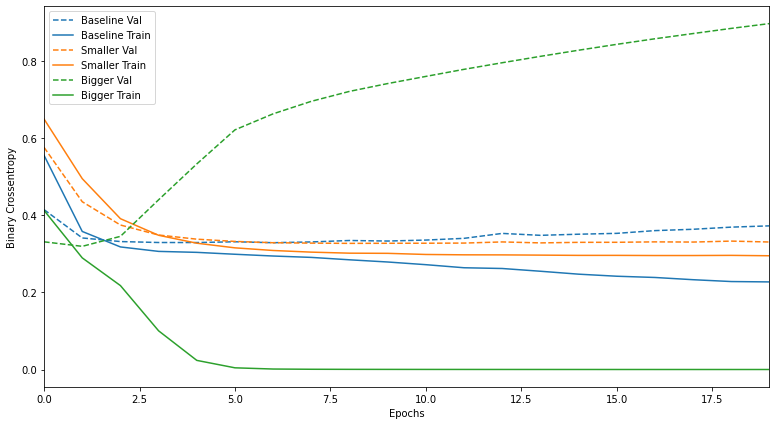

In [ ]:
# 실선 - 훈련 손실
# 점선 - 검증 손실

def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(13,7))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

### 과대적합을 방지하기 위한 전략

### 가중치를 규제하기
- 간단한 모델은 복잡한 것보다 과대적합 되는 경향이 작음
  - 간단한 모델이란 모델 파라미터의 분포를 봤을 때 엔트로피가 작은 모델(또는 적은 파라미터를 가진 모델)
- 과대적합을 완화시키는 일반적인 방법은 가중치가 작은 값을 가지도록 네트워크의 복잡도에 제약을 해 가중치 값의 분포를 좀 더 균일하게 만들어줌



- L1 규제
  - 가중치의 절댓값에 비례하는 비용이 추가됨
  - 일부 가중치 파라미터를 0으로 만듬
- L2 규제
  - 가중치의 제곱에 비례하는 비용이 추가됨
  - 가중치 파라미터를 제한하지만 완전히 0으로 만들지는 않음



In [ ]:
# 각 층마다 l2 규제 추가
# 네트워크의 전체 솔신에 층에 있는 가중치 행렬의 모든 값이
# 0.001 * weight_coefficient_value**2 만큼 더해짐 
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6344 - accuracy: 0.7087 - binary_crossentropy: 0.5910 - val_loss: 0.4946 - val_accuracy: 0.8099 - val_binary_crossentropy: 0.4533
Epoch 2/20
49/49 - 0s - loss: 0.4168 - accuracy: 0.8427 - binary_crossentropy: 0.3752 - val_loss: 0.3836 - val_accuracy: 0.8568 - val_binary_crossentropy: 0.3421
Epoch 3/20
49/49 - 0s - loss: 0.3614 - accuracy: 0.8657 - binary_crossentropy: 0.3206 - val_loss: 0.3694 - val_accuracy: 0.8610 - val_binary_crossentropy: 0.3294
Epoch 4/20
49/49 - 0s - loss: 0.3472 - accuracy: 0.8734 - binary_crossentropy: 0.3080 - val_loss: 0.3655 - val_accuracy: 0.8614 - val_binary_crossentropy: 0.3272
Epoch 5/20
49/49 - 0s - loss: 0.3403 - accuracy: 0.8761 - binary_crossentropy: 0.3028 - val_loss: 0.3692 - val_accuracy: 0.8604 - val_binary_crossentropy: 0.3325
Epoch 6/20
49/49 - 0s - loss: 0.3391 - accuracy: 0.8748 - binary_crossentropy: 0.3029 - val_loss: 0.3630 - val_accuracy: 0.8608 - val_binary_crossentropy: 0.3274
Epoch 7/20
49/49 - 0s - loss

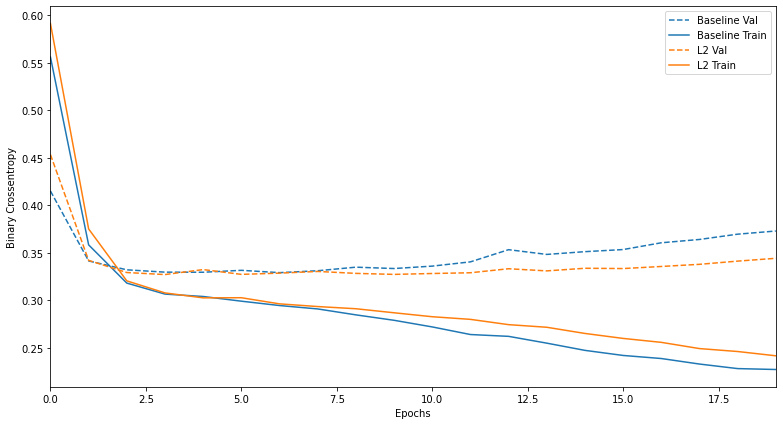

In [ ]:
# L2 규제가 과적합에 잘 견딤
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

### 드롭아웃 추가하기
- 드롭아웃 비율은 0이 되는 특성의 비율
- 0.2 ~ 0.5 사이를 사용

In [ ]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6809 - accuracy: 0.5538 - binary_crossentropy: 0.6809 - val_loss: 0.6469 - val_accuracy: 0.7532 - val_binary_crossentropy: 0.6469
Epoch 2/20
49/49 - 0s - loss: 0.5879 - accuracy: 0.6962 - binary_crossentropy: 0.5879 - val_loss: 0.4779 - val_accuracy: 0.8269 - val_binary_crossentropy: 0.4779
Epoch 3/20
49/49 - 0s - loss: 0.4796 - accuracy: 0.7853 - binary_crossentropy: 0.4796 - val_loss: 0.3840 - val_accuracy: 0.8475 - val_binary_crossentropy: 0.3840
Epoch 4/20
49/49 - 0s - loss: 0.4210 - accuracy: 0.8236 - binary_crossentropy: 0.4210 - val_loss: 0.3436 - val_accuracy: 0.8547 - val_binary_crossentropy: 0.3436
Epoch 5/20
49/49 - 0s - loss: 0.3904 - accuracy: 0.8440 - binary_crossentropy: 0.3904 - val_loss: 0.3319 - val_accuracy: 0.8581 - val_binary_crossentropy: 0.3319
Epoch 6/20
49/49 - 0s - loss: 0.3712 - accuracy: 0.8531 - binary_crossentropy: 0.3712 - val_loss: 0.3265 - val_accuracy: 0.8581 - val_binary_crossentropy: 0.3265
Epoch 7/20
49/49 - 0s - loss

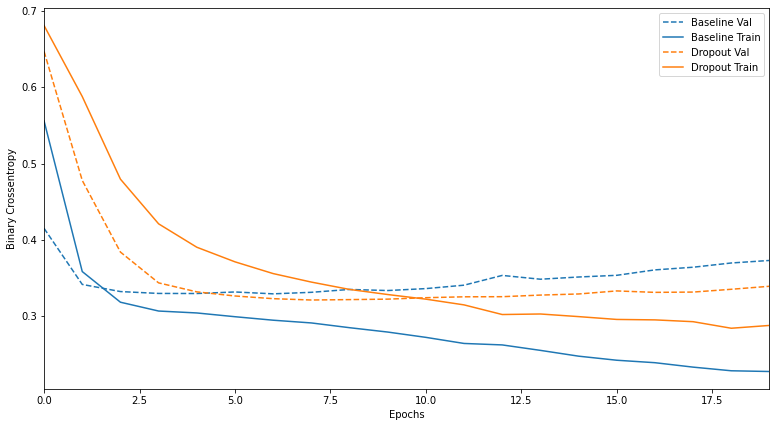

In [ ]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

### 정리
- 더 많은 훈련 데이터를 모으고
- 네트워크의 용량을 줄이고
- 가중치 규제를 추가하고
- 드롭아웃을 추가함

---

## 저장 및 로드

### 모델 저장과 복원
- 훈련 도중이나 훈련이 끝난 후에 모델을 저장할 수 있음
  - 한 번에 오랫동안 훈련하지 않아도 됨
  - 모델을 다른 사람에게 공유할 수 있음

In [ ]:
pip install -q pyyaml h5py  # HDF5 포맷으로 모델을 저장하기 위해서 필요합니다

In [ ]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.4.1


In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.0
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.0

11493376/11490434 [==============================] - 0s 0us/step


### 모델 정의

In [ ]:
# 간단한 Sequential 모델을 정의합니다
def create_model():
  model = tf.keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)])
  model.compile(optimizer='adam',
                loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

# 모델 객체를 만듬
model = create_model()

# 모델 구조를 출력
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### 훈련 하는 동안 체크포인트 저장
- 체크포인트를 사용하면 다시 훈련하지 않고 모델을 재사용하거나 이어서 훈련을 진행할 수 있음

In [ ]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# 모델의 가중치를 저장하는 콜백 만들기
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# 새로운 콜백으로 모델 훈련
model.fit(train_images, 
          train_labels,  
          epochs=10,
          validation_data=(test_images,test_labels),
          callbacks=[cp_callback])  # 콜백을 훈련에 전달합니다

Epoch 1/10
32/32 [==============================] - 1s 10ms/step - loss: 1.5549 - accuracy: 0.5032 - val_loss: 0.7606 - val_accuracy: 0.7590

Epoch 00001: saving model to training_1/cp.ckpt
Epoch 2/10
32/32 [==============================] - 0s 6ms/step - loss: 0.4694 - accuracy: 0.8604 - val_loss: 0.5710 - val_accuracy: 0.8280

Epoch 00002: saving model to training_1/cp.ckpt
Epoch 3/10
32/32 [==============================] - 0s 6ms/step - loss: 0.3295 - accuracy: 0.8995 - val_loss: 0.4753 - val_accuracy: 0.8550

Epoch 00003: saving model to training_1/cp.ckpt
Epoch 4/10
32/32 [==============================] - 0s 6ms/step - loss: 0.2352 - accuracy: 0.9355 - val_loss: 0.4684 - val_accuracy: 0.8570

Epoch 00004: saving model to training_1/cp.ckpt
Epoch 5/10
32/32 [==============================] - 0s 6ms/step - loss: 0.1410 - accuracy: 0.9670 - val_loss: 0.4361 - val_accuracy: 0.8600

Epoch 00005: saving model to training_1/cp.ckpt
Epoch 6/10
32/32 [==============================] - 0s

In [ ]:
ls {checkpoint_dir}

checkpoint  cp.ckpt.data-00000-of-00001  cp.ckpt.index


In [ ]:
# 기본 모델 객체를 만듬
model = create_model()

# 모델을 평가
loss, acc = model.evaluate(test_images,  test_labels, verbose=2)
print("훈련되지 않은 모델의 정확도: {:5.2f}%".format(100*acc))

32/32 - 0s - loss: 2.3723 - accuracy: 0.1250
훈련되지 않은 모델의 정확도: 12.50%


In [ ]:
# 가중치 로드
model.load_weights(checkpoint_path)

# 모델 재평가
loss,acc = model.evaluate(test_images,  test_labels, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

32/32 - 0s - loss: 0.4256 - accuracy: 0.8690
복원된 모델의 정확도: 86.90%


### 체크포인트 콜백 매개변수
- 체크포인트 이름을 고유하게 만들거나 체크포인트 주기 조정 가능

In [ ]:
# 파일 이름에 에포크 번호를 포함`str.format` 포맷)
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# 다섯 번째 에포크마다 가중치를 저장하기 위한 콜백을 만듬
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    period=5)

# 새로운 모델 객체를 만듬
model = create_model()

# `checkpoint_path` 포맷을 사용하는 가중치를 저장
model.save_weights(checkpoint_path.format(epoch=0))

# 새로운 콜백을 사용하여 모델을 훈련
model.fit(train_images, 
          train_labels,
          epochs=50, 
          callbacks=[cp_callback],
          validation_data=(test_images,test_labels),
          verbose=0)


Epoch 00005: saving model to training_2/cp-0005.ckpt

Epoch 00010: saving model to training_2/cp-0010.ckpt

Epoch 00015: saving model to training_2/cp-0015.ckpt

Epoch 00020: saving model to training_2/cp-0020.ckpt

Epoch 00025: saving model to training_2/cp-0025.ckpt

Epoch 00030: saving model to training_2/cp-0030.ckpt

Epoch 00035: saving model to training_2/cp-0035.ckpt

Epoch 00040: saving model to training_2/cp-0040.ckpt

Epoch 00045: saving model to training_2/cp-0045.ckpt

Epoch 00050: saving model to training_2/cp-0050.ckpt


In [ ]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'training_2/cp-0050.ckpt'

In [ ]:
# 모델 초기화 후 새로운 모델 객체를 만듬
model = create_model()

# 이전에 저장한 가중치를 로드
model.load_weights(latest)

# 모델을 재평가
loss, acc = model.evaluate(test_images,  test_labels, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

32/32 - 0s - loss: 0.4890 - accuracy: 0.8730
복원된 모델의 정확도: 87.30%


### 수동으로 가중치 저장
- Model.save_weights 메서드 사용

In [ ]:
# 가중치를 저장
model.save_weights('./checkpoints/my_checkpoint')

# 새로운 모델 객체를 만듬
model = create_model()

# 가중치를 복원
model.load_weights('./checkpoints/my_checkpoint')

# 모델 평가
loss,acc = model.evaluate(test_images,  test_labels, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

32/32 - 0s - loss: 0.4890 - accuracy: 0.8730
복원된 모델의 정확도: 87.30%


### 전체 모델 저장하기
- model.save 메서드를 호출하여 모델의 구조, 가중치, 훈련 설정을 하나의 파일에 저장
- 모델을 저장하기 때문에 원본 파이썬 코드가 없어도 사용 가능

In [ ]:
# 새로운 모델 객체를 만들고 훈련
model = create_model()
model.fit(train_images, train_labels, epochs=5)

# SavedModel로 전체 모델 저장
!mkdir -p saved_model
model.save('saved_model/my_model')

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 1.5419 - accuracy: 0.5388
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.4563 - accuracy: 0.8579
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.3066 - accuracy: 0.9182
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.2015 - accuracy: 0.9540
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.1471 - accuracy: 0.9709
INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [ ]:
# SavedModel 포맷은 프로토콜 버퍼 이진 파일과 텐서플로 체크포인트를 담고 있는 디렉토리
new_model = tf.keras.models.load_model('saved_model/my_model')

# 모델 구조를 확인
new_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 복원된 모델 평가
loss, acc = new_model.evaluate(test_images,  test_labels, verbose=2)
print('복원된 모델의 정확도: {:5.2f}%'.format(100*acc))

print(new_model.predict(test_images).shape)

32/32 - 0s - loss: 0.4276 - accuracy: 0.8620
복원된 모델의 정확도: 86.20%
(1000, 10)


# HDF5 파일로 저장하기

In [ ]:
# 새로운 모델 객체를 만들고 훈련
model = create_model()
model.fit(train_images, train_labels, epochs=5)

# 전체 모델을 HDF5 파일로 저장
# '.h5' 확장자는 이 모델이 HDF5로 저장되었다는 것을 나타냄
model.save('my_model.h5')

Epoch 1/5
32/32 [==============================] - 0s 3ms/step - loss: 1.5732 - accuracy: 0.5156
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.8868
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.3093 - accuracy: 0.9156
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.2116 - accuracy: 0.9554
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.1465 - accuracy: 0.9767


In [ ]:
# 가중치와 옵티마이저를 포함하여 정확히 동일한 모델을 다시 생성
new_model = tf.keras.models.load_model('my_model.h5')
new_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss, acc = new_model.evaluate(test_images,  test_labels, verbose=2)
print('복원된 모델의 정확도: {:5.2f}%'.format(100*acc))

32/32 - 0s - loss: 0.4434 - accuracy: 0.8600
복원된 모델의 정확도: 86.00%


### 정리 
- 케라스는 모델 구조를 파악하여 저장
  - 가중치 값
  - 모델 구조
  - 모델의 훈련 설정
  - 옵티마이저와 옵티마이저 상태

### 사용자 정의 객체
- HDF5와 SavedModel 사이의 주요 차이점은 HDF5가 객체로 모델 구조를 저장하고 
- SavedModel은 실행 그래프로 저장 
  - 원본 코드 없이 상속 모델과 사용자 정의 층 같은 사용자 정의 객체를 저장할 수 있음

---

## Keras Tuner로 초매개변수 미세조정

- Keras Tuner는 TensorFlow 프로그램에 대한 최적의 하이퍼파라미터 세트를 선택하는데 도움을 주는 라이브러리 
- 애플리케이션에 대한 올바른 하이퍼파라미터 세트를 선택하는 과정을 하이퍼파라미터 조정 또는 하이퍼튜닝이라고 함

- 하이퍼파라미터는 훈련 프로세스 및 ML 모델의 토폴로지를 제어하는 변수
  - 숨겨진 레이어의 수 및 너비와 같이 모델 선택에 영향을 미치는 모델 하이퍼파라미터
  - 학습 알고리즘의 속도와 품질에 영향을 주는 알고리즘 하이퍼파라미터


In [ ]:
import tensorflow as tf
from tensorflow import keras

import IPython

In [ ]:
!pip install -q -U keras-tuner
import kerastuner as kt

     |████████████████████████████████| 71kB 3.2MB/s 


In [ ]:
(img_train, label_train), (img_test, label_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# Normalize 
img_train = img_train.astype('float32') / 255.0
img_test = img_test.astype('float32') / 255.0

### 모델 정의하기
- 하이퍼튜닝을 위한 모델을 빌드 할 때는 모델 아키텍처와 더불어 하이퍼파라미터 검색 공간도 정의
  - 모델 빌더 함수 사용
  - Keras Tuner API의 HyperModel 클래스를 하위 클래스화

In [ ]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))

  # 첫 번째 덴스 레이어의 숫자 지정
  # 32~512 사이 중에서 최적의 값 선택
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(10))

  # 옵티마이저의 러닝레이트 설정
  # 0.01, 0.001 또는 0.0001 중에서 최적값 선택
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 

  model.compile(optimizer = keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                metrics = ['accuracy'])

  return model

### 튜너를 인스턴스화하고 하이퍼튜닝 수행하기
Keras Tuner의 네 가지 튜너
- RandomSearch
- Hyperband
- BayesianOptimization
- Sklearn

In [ ]:
# Hyperband 튜너를 인스턴스화하려면 최적화할 하이퍼모델인 
# objective, 및 훈련할 최대 epoch 수(max_epochs)를 지정해야 함
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy', 
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

- Hyperband 튜닝 알고리즘은 적응형 리소스 할당 및 조기 중단을 사용하여 고성능 모델에함 신속하게 수렴
- Hyperband는 1 + logfactor( max_epochs)를 계산하고 이를 가장 가까운 정수로 반올림하여 한 브래킷에서 훈련할 모델 수를 결정

In [ ]:
# 훈련 단계가 끝날 때마다 훈련 결과를 지우도록 콜백을 정의합니다.
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [ ]:
tuner.search(img_train, label_train, epochs = 10, validation_data = (img_test, label_test), callbacks = [ClearTrainingOutput()])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

In [ ]:
# 최적의 하이퍼파라미터로 모델 재훈련
model = tuner.hypermodel.build(best_hps)
model.fit(img_train, label_train, epochs = 10, validation_data = (img_test, label_test))